# PREDICTION OF HEART DISEASE BY USING MACHINE LEARNING ALGORITHMS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# finding the shape of the data set
df.shape

(303, 14)

In [7]:
#checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:

df['target'].value_counts() 

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

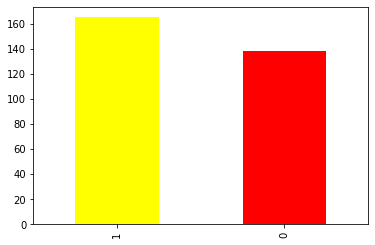

In [9]:
df['target'].value_counts().plot(kind='bar',color=['yellow','red'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# finding the datatype of each attribute
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
df['sex'].value_counts() # 0 means famale and 1 means male

1    207
0     96
Name: sex, dtype: int64

In [13]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


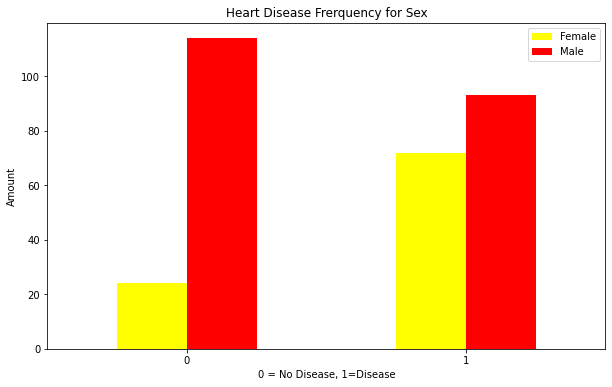

In [14]:
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6),color=["yellow","red"])
plt.title("Heart Disease Frerquency for Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);


In [15]:
#heart disease realated to chest pain
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


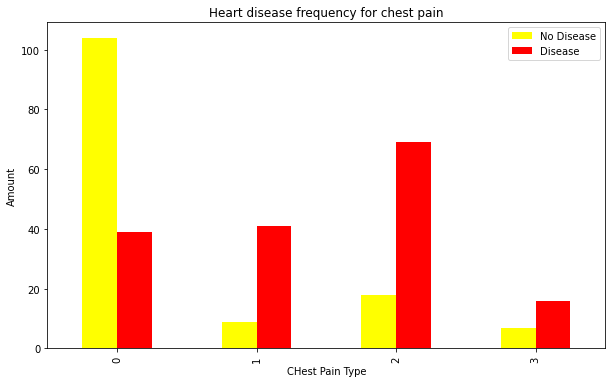

In [16]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["yellow","red"])
plt.title("Heart disease frequency for chest pain")
plt.xlabel("CHest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])

In [17]:
#correlation between attributes
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [18]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [19]:
#splitting the dataset into independent and dependent feature
x=df.drop('target',axis=1)#x is indepensent
y=df['target']#y is dependent

In [20]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)#test_size=0.2 that means 80% of data for traing pupose and 20% of data for testing purpose


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [24]:
models={'Logistic Regression':LogisticRegression(),
        'Decision Tree':DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
       'Gaussian Naive bayes':GaussianNB(),
       'Support Vector Machine':svm.SVC(),
       'K Nearest Neighbor Classifier':KNeighborsClassifier()}


In [25]:
#fitting and finding the score of models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    #setting seed value
    np.random.seed(42)
    #dictionary to keep model scores
    model_scores = {}
    #loop thru models
    for name, model in models.items():
        #fit model
        model.fit(X_train, y_train)
        #evaluate model and append score
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
print("TESTING ACCURACY OF EACH MODEL")
model_scores

TESTING ACCURACY OF EACH MODEL


C:\Users\ajay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'Decision Tree': 0.7377049180327869,
 'Random Forest': 0.9180327868852459,
 'Gaussian Naive bayes': 0.8852459016393442,
 'Support Vector Machine': 0.7049180327868853,
 'K Nearest Neighbor Classifier': 0.6721311475409836}

Text(0.5, 1.0, 'TESTING ACCURACY OF EACH MODEL')

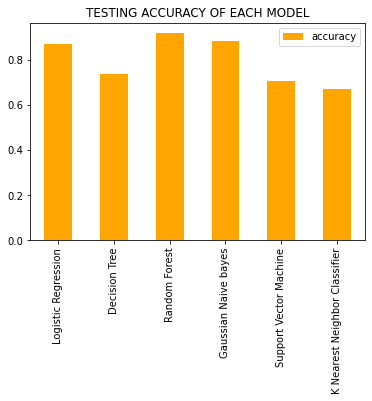

In [27]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color='orange')
plt.title('TESTING ACCURACY OF EACH MODEL')

In [28]:
#finding the prediction accuracy using confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [29]:
def metric_score(y_test,y_pred):
    print("confusion_matrix",confusion_matrix(y_test,y_pred))
    print("classification_report",classification_report(y_test,y_pred))
    print("accuracy_score",accuracy_score(y_test,y_pred))

Prediction Using Logistic Regression

In [30]:
#creating object Logistic Regression
lr=LogisticRegression()


In [31]:
#fitting the data into Logistic Regression model
lr.fit(X_train,y_train)

C:\Users\ajay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# predicting the target
y_pred_lr=lr.predict(X_test)
y_pred_lr

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [33]:
#finding the prediction accuracy by using different metrics
metric_score(y_test,y_pred_lr)

confusion_matrix [[20  5]
 [ 3 33]]
classification_report               precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.87      0.92      0.89        36

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61

accuracy_score 0.8688524590163934


In [34]:
accuracy_score_of_LR=accuracy_score(y_test,y_pred_lr)
accuracy_score_of_LR

0.8688524590163934

Prediction Using Decision Tree Classifier

In [35]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
#predicting the target
y_pred_dt=dt.predict(X_test)
y_pred_dt

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [37]:
#finding the prediction accuracy by using different metrics
metric_score(y_test,y_pred_dt)

confusion_matrix [[19  6]
 [ 8 28]]
classification_report               precision    recall  f1-score   support

           0       0.70      0.76      0.73        25
           1       0.82      0.78      0.80        36

    accuracy                           0.77        61
   macro avg       0.76      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

accuracy_score 0.7704918032786885


In [38]:
accuracy_score_of_DT=accuracy_score(y_test,y_pred_dt)
accuracy_score_of_DT

0.7704918032786885

Prediction Using Random Forest Classifier

In [39]:
rf=RandomForestClassifier()

In [40]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [42]:
#finding the prediction accuracy by using different metrics
metric_score(y_test,y_pred_rf)

confusion_matrix [[21  4]
 [ 2 34]]
classification_report               precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61

accuracy_score 0.9016393442622951


In [43]:
accuracy_score_of_RF=accuracy_score(y_test,y_pred_rf)
accuracy_score_of_RF

0.9016393442622951

Prediction using Gaussian Naive Bayes Classifier

In [44]:
gnb=GaussianNB()
gnb.fit(X_test,y_test)

GaussianNB()

In [45]:
y_pred_gnb=gnb.predict(X_test)
y_pred_gnb

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [46]:
#finding the prediction accuracy by using different metrics
metric_score(y_test,y_pred_gnb)

confusion_matrix [[21  4]
 [ 2 34]]
classification_report               precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61

accuracy_score 0.9016393442622951


In [47]:
accuracy_score_of_GNB=accuracy_score(y_test,y_pred_gnb)
accuracy_score_of_GNB

0.9016393442622951

Prediction using support vector machine

In [48]:
svm=svm.SVC()

In [49]:
svm.fit(X_test,y_test)

SVC()

In [50]:
y_pred_svm=gnb.predict(X_test)
y_pred_svm

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [51]:
#finding the prediction accuracy by using different metrics
metric_score(y_test,y_pred_gnb)

confusion_matrix [[21  4]
 [ 2 34]]
classification_report               precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61

accuracy_score 0.9016393442622951


In [52]:
accuracy_score_of_SVM=accuracy_score(y_test,y_pred_svm)
accuracy_score_of_SVM

0.9016393442622951

Prediction using KNeighborsClassifier

In [53]:
knn=KNeighborsClassifier()

In [54]:
knn.fit(X_test,y_test)

KNeighborsClassifier()

In [55]:
y_pred_knn=gnb.predict(X_test)
y_pred_knn

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [56]:
accuracy_score_of_KNN=accuracy_score(y_test,y_pred_knn)
accuracy_score_of_KNN

0.9016393442622951

In [57]:
accuracy_scores=[accuracy_score_of_LR,accuracy_score_of_DT,accuracy_score_of_RF,accuracy_score_of_GNB,accuracy_score_of_SVM,accuracy_score_of_KNN]
Algorithms=['Logistic Regression',
        'Decision Tree',
        'Random Forest',
       'Gaussian Naive bayes',
       'Support Vector Machine',
       'K Nearest Neighbor Classifier']

In [58]:
print(accuracy_scores)
print(Algorithms)

[0.8688524590163934, 0.7704918032786885, 0.9016393442622951, 0.9016393442622951, 0.9016393442622951, 0.9016393442622951]
['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gaussian Naive bayes', 'Support Vector Machine', 'K Nearest Neighbor Classifier']


In [59]:
for i in range(len(Algorithms)):
    print("The accuracy score achieved using "+Algorithms[i]+" is: "+str(accuracy_scores[i]*100)+" %")

The accuracy score achieved using Logistic Regression is: 86.88524590163934 %
The accuracy score achieved using Decision Tree is: 77.04918032786885 %
The accuracy score achieved using Random Forest is: 90.1639344262295 %
The accuracy score achieved using Gaussian Naive bayes is: 90.1639344262295 %
The accuracy score achieved using Support Vector Machine is: 90.1639344262295 %
The accuracy score achieved using K Nearest Neighbor Classifier is: 90.1639344262295 %


Text(0, 0.5, 'ACCUARCY SCORE')

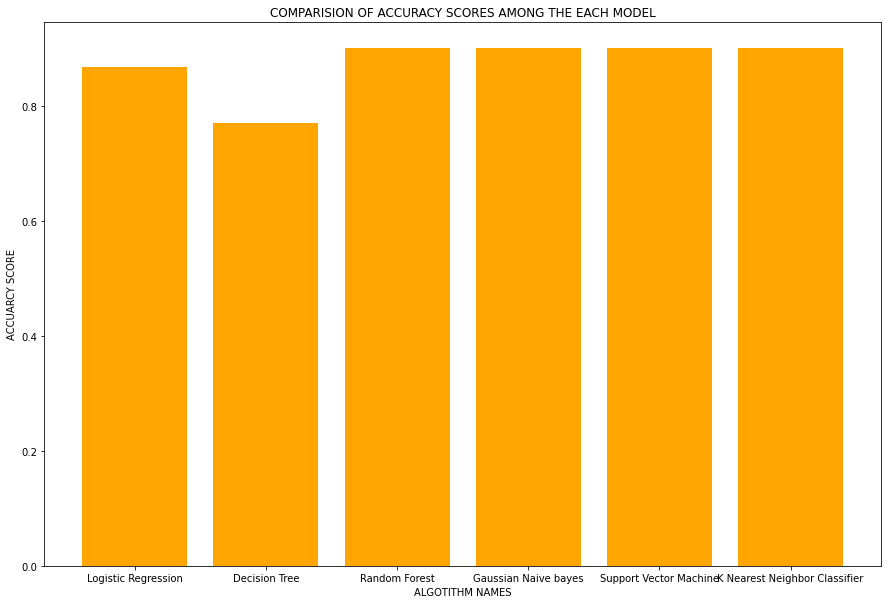

In [63]:
plt.figure(figsize=(15,10))
plt.bar(Algorithms,accuracy_scores,color='orange')
plt.title("COMPARISION OF ACCURACY SCORES AMONG THE EACH MODEL")
plt.xlabel('ALGOTITHM NAMES')
plt.ylabel("ACCUARCY SCORE")